# Preprocessing

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv('/Users/dennisfrancis/Desktop/Data/house_prices_clean.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 63 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     1460 non-null   int64 
 1   Id             1460 non-null   int64 
 2   MSSubClass     1460 non-null   int64 
 3   MSZoning       1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   LotShape       1460 non-null   object
 7   LandContour    1460 non-null   object
 8   Utilities      1460 non-null   object
 9   LotConfig      1460 non-null   object
 10  LandSlope      1460 non-null   object
 11  Neighborhood   1460 non-null   object
 12  Condition1     1460 non-null   object
 13  Condition2     1460 non-null   object
 14  BldgType       1460 non-null   object
 15  HouseStyle     1460 non-null   object
 16  OverallQual    1460 non-null   int64 
 17  OverallCond    1460 non-null   int64 
 18  YearBuilt      1460 non-null

In [5]:
df.drop(columns=['Unnamed: 0', 'Id'], inplace=True)

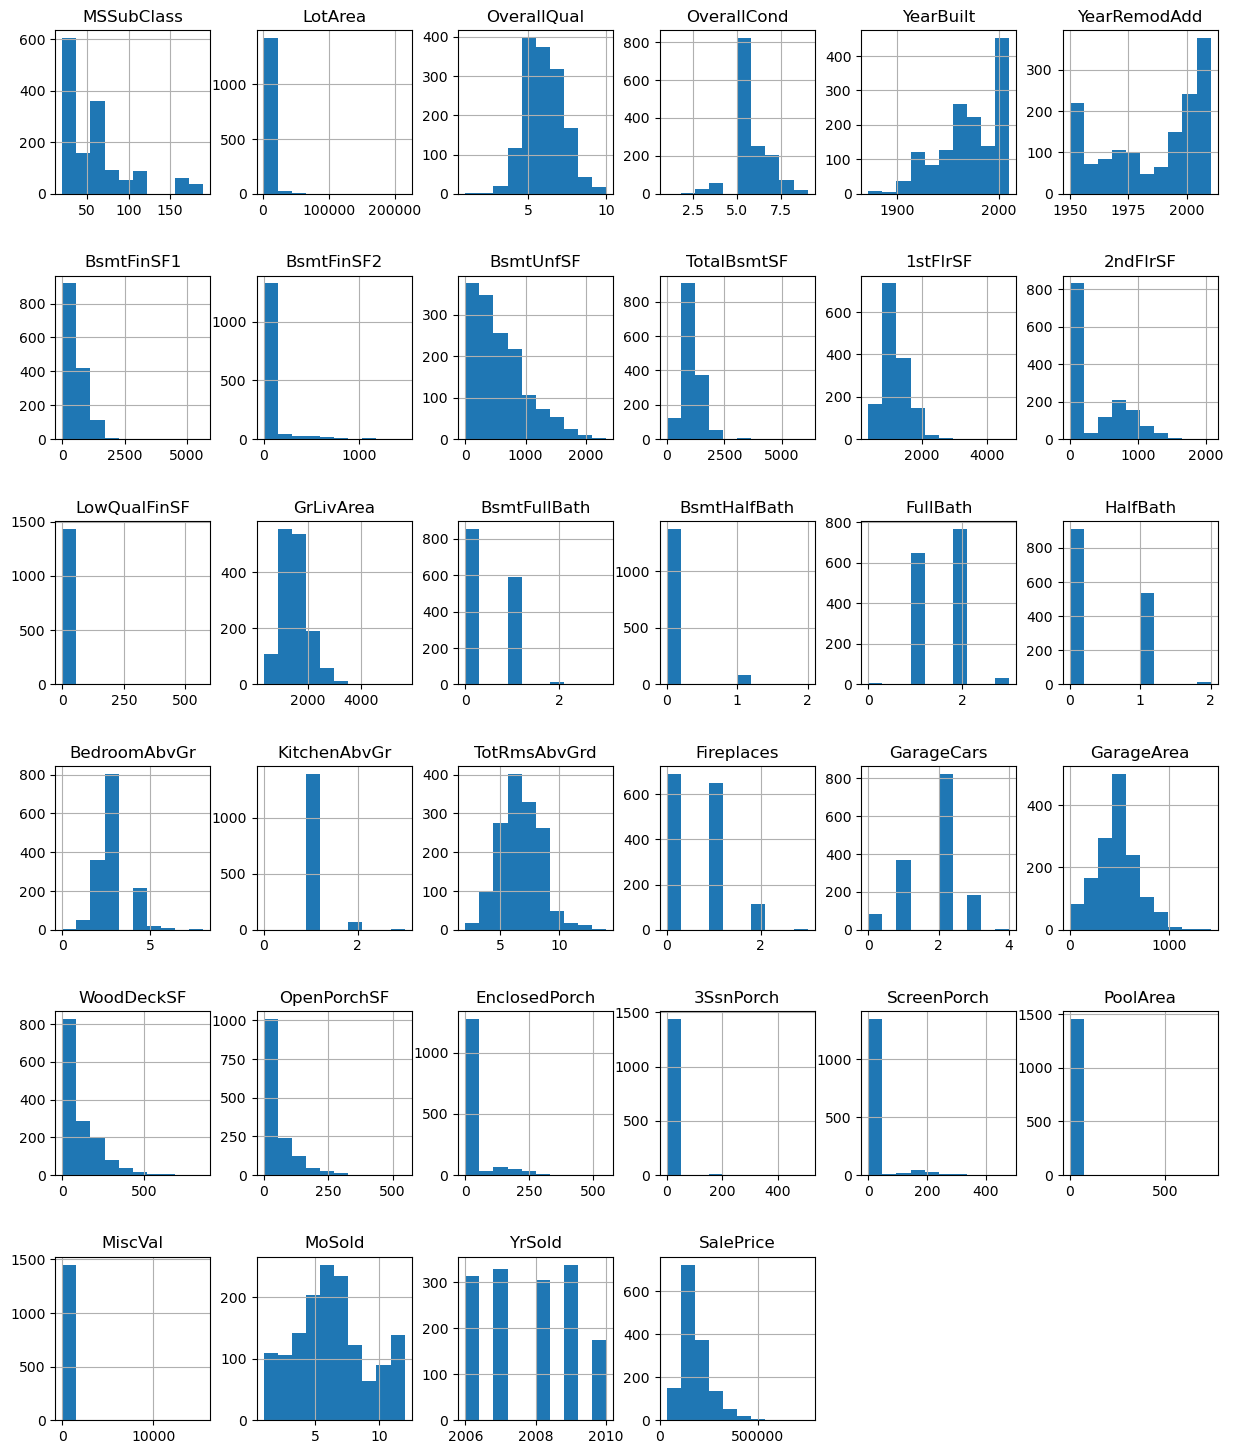

In [6]:
df.hist(figsize=(15, 10));
plt.subplots_adjust(hspace=0.5, top=1.5);

In [7]:
df.drop(columns=['PoolArea', '3SsnPorch','MiscVal', 'LowQualFinSF'], inplace=True)

In [8]:
min_max_cols = ['YearBuilt','YearRemodAdd','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','WoodDeckSF',\
              'OpenPorchSF']


In [9]:
scaler = MinMaxScaler()

min_max_cols = ['YearBuilt','YearRemodAdd','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','WoodDeckSF',\
              'OpenPorchSF']
col_and_prefix = [col + '_normalized' for col in min_max_cols]

scaler.fit(df[min_max_cols])
normalized_array = scaler.transform(df[min_max_cols])
df_normalized = pd.DataFrame(normalized_array, columns=col_and_prefix)
df.drop(columns=min_max_cols, inplace=True)
df = pd.concat([df, df_normalized], axis=1, sort=False)

In [10]:
set(df.select_dtypes(int).columns) - set(min_max_cols)

{'BedroomAbvGr',
 'BsmtFinSF2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'EnclosedPorch',
 'Fireplaces',
 'FullBath',
 'GarageArea',
 'GarageCars',
 'GrLivArea',
 'HalfBath',
 'KitchenAbvGr',
 'LotArea',
 'MSSubClass',
 'MoSold',
 'OverallCond',
 'OverallQual',
 'SalePrice',
 'ScreenPorch',
 'TotRmsAbvGrd',
 'YrSold'}

In [11]:
standard_cols = set(df.select_dtypes(int).columns) - set(min_max_cols)
standard_cols = standard_cols - set(['LotArea', 'BsmtFinSF2'])
standard_cols = list(standard_cols)

In [12]:
scaler = StandardScaler()

col_and_prefix = [col + '_normalized' for col in standard_cols]

scaler.fit(df[standard_cols])
normalized_array = scaler.transform(df[standard_cols])
df_normalized = pd.DataFrame(normalized_array, columns=col_and_prefix)
df.drop(columns=standard_cols, inplace=True)
df = pd.concat([df, df_normalized], axis=1, sort=False)

In [13]:
log = PowerTransformer()

cols = ['LotArea', 'BsmtFinSF2']
col_and_prefix = [col + '_standardized' for col in cols]

log_array = log.fit_transform(df[cols])
df_log = pd.DataFrame(log_array, columns=col_and_prefix)
df.drop(columns=cols, inplace=True)
df = pd.concat([df, df_log], axis=1, sort=False)

In [15]:
df.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,OverallQual_normalized,OverallCond_normalized,GrLivArea_normalized,MSSubClass_normalized,BsmtHalfBath_normalized,SalePrice_normalized,TotRmsAbvGrd_normalized,MoSold_normalized,LotArea_standardized,BsmtFinSF2_standardized
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,0.651479,-0.517200,0.370333,0.073375,-0.241061,0.347273,0.912210,-1.599111,-0.141171,-0.359384
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,-0.071836,2.179628,-0.482512,-0.872563,3.948809,0.007288,-0.318683,-0.489110,0.105609,-0.359384
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,0.651479,-0.517200,0.515013,0.073375,-0.241061,0.536154,-0.318683,0.990891,0.413721,-0.359384
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,0.651479,-0.517200,0.383659,0.309859,-0.241061,-0.515281,0.296763,-1.599111,0.095490,-0.359384
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,1.374795,-0.517200,1.299326,0.073375,-0.241061,0.869843,1.527656,2.100892,0.877127,-0.359384


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MSZoning                  1460 non-null   object 
 1   Street                    1460 non-null   object 
 2   LotShape                  1460 non-null   object 
 3   LandContour               1460 non-null   object 
 4   Utilities                 1460 non-null   object 
 5   LotConfig                 1460 non-null   object 
 6   LandSlope                 1460 non-null   object 
 7   Neighborhood              1460 non-null   object 
 8   Condition1                1460 non-null   object 
 9   Condition2                1460 non-null   object 
 10  BldgType                  1460 non-null   object 
 11  HouseStyle                1460 non-null   object 
 12  RoofStyle                 1460 non-null   object 
 13  RoofMatl                  1460 non-null   object 
 14  Exterior

In [18]:
cat_cols = df.select_dtypes('object').columns.tolist()
cat_cols

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'KitchenQual',
 'Functional',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [23]:
df2 = pd.get_dummies(df, columns=cat_cols, prefix='D')

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 212 entries, YearBuilt_normalized to D_Partial
dtypes: float64(30), uint8(182)
memory usage: 601.8 KB


In [27]:
df2.head()

,YearBuilt_normalized,YearRemodAdd_normalized,BsmtFinSF1_normalized,BsmtUnfSF_normalized,TotalBsmtSF_normalized,1stFlrSF_normalized,2ndFlrSF_normalized,WoodDeckSF_normalized,OpenPorchSF_normalized,YrSold_normalized,...,D_ConLw,D_New,D_Oth,D_WD,D_Abnorml,D_AdjLand,D_Alloca,D_Family,D_Normal,D_Partial
0,0.949275,0.883333,0.125089,0.064212,0.140098,0.119780,0.413559,0.000000,0.111517,0.138777,...,0,0,0,1,0,0,0,0,1,0
1,0.753623,0.433333,0.173281,0.121575,0.206547,0.212942,0.000000,0.347725,0.000000,-0.614439,...,0,0,0,1,0,0,0,0,1,0
2,0.934783,0.866667,0.086109,0.185788,0.150573,0.134465,0.419370,0.000000,0.076782,0.138777,...,0,0,0,1,0,0,0,0,1,0
3,0.311594,0.333333,0.038271,0.231164,0.123732,0.143873,0.366102,0.000000,0.063985,-1.367655,...,0,0,0,1,1,0,0,0,0,0
4,0.927536,0.833333,0.116052,0.209760,0.187398,0.186095,0.509927,0.224037,0.153565,0.138777,...,0,0,0,1,0,0,0,0,1,0


In [28]:
pd.set_option('display.max_columns', None)

In [29]:
df2.head()

,YearBuilt_normalized,YearRemodAdd_normalized,BsmtFinSF1_normalized,BsmtUnfSF_normalized,TotalBsmtSF_normalized,1stFlrSF_normalized,2ndFlrSF_normalized,WoodDeckSF_normalized,OpenPorchSF_normalized,YrSold_normalized,EnclosedPorch_normalized,GarageCars_normalized,HalfBath_normalized,Fireplaces_normalized,ScreenPorch_normalized,FullBath_normalized,BsmtFullBath_normalized,GarageArea_normalized,BedroomAbvGr_normalized,KitchenAbvGr_normalized,OverallQual_normalized,OverallCond_normalized,GrLivArea_normalized,MSSubClass_normalized,BsmtHalfBath_normalized,SalePrice_normalized,TotRmsAbvGrd_normalized,MoSold_normalized,LotArea_standardized,BsmtFinSF2_standardized,D_C (all),D_FV,D_RH,D_RL,D_RM,D_Grvl,D_Pave,D_IR1,D_IR2,D_IR3,D_Reg,D_Bnk,D_HLS,D_Low,D_Lvl,D_AllPub,D_NoSeWa,D_Corner,D_CulDSac,D_FR2,D_FR3,D_Inside,D_Gtl,D_Mod,D_Sev,D_Blmngtn,D_Blueste,D_BrDale,D_BrkSide,D_ClearCr,D_CollgCr,D_Crawfor,D_Edwards,D_Gilbert,D_IDOTRR,D_MeadowV,D_Mitchel,D_NAmes,D_NPkVill,D_NWAmes,D_NoRidge,D_NridgHt,D_OldTown,D_SWISU,D_Sawyer,D_SawyerW,D_Somerst,D_StoneBr,D_Timber,D_Veenker,D_Artery,D_Feedr,D_Norm,D_PosA,D_PosN,D_RRAe,D_RRAn,D_RRNe,D_RRNn,D_Artery,D_Feedr,D_Norm,D_PosA,D_PosN,D_RRAe,D_RRAn,D_RRNn,D_1Fam,D_2fmCon,D_Duplex,D_Twnhs,D_TwnhsE,D_1.5Fin,D_1.5Unf,D_1Story,D_2.5Fin,D_2.5Unf,D_2Story,D_SFoyer,D_SLvl,D_Flat,D_Gable,D_Gambrel,D_Hip,D_Mansard,D_Shed,D_ClyTile,D_CompShg,D_Membran,D_Metal,D_Roll,D_Tar&Grv,D_WdShake,D_WdShngl,D_AsbShng,D_AsphShn,D_BrkComm,D_BrkFace,D_CBlock,D_CemntBd,D_HdBoard,D_ImStucc,D_MetalSd,D_Plywood,D_Stone,D_Stucco,D_VinylSd,D_Wd Sdng,D_WdShing,D_AsbShng,D_AsphShn,D_Brk Cmn,D_BrkFace,D_CBlock,D_CmentBd,D_HdBoard,D_ImStucc,D_MetalSd,D_Other,D_Plywood,D_Stone,D_Stucco,D_VinylSd,D_Wd Sdng,D_Wd Shng,D_Ex,D_Fa,D_Gd,D_TA,D_Ex,D_Fa,D_Gd,D_Po,D_TA,D_BrkTil,D_CBlock,D_PConc,D_Slab,D_Stone,D_Wood,D_Floor,D_GasA,D_GasW,D_Grav,D_OthW,D_Wall,D_Ex,D_Fa,D_Gd,D_Po,D_TA,D_N,D_Y,D_Ex,D_Fa,D_Gd,D_TA,D_Maj1,D_Maj2,D_Min1,D_Min2,D_Mod,D_Sev,D_Typ,D_N,D_P,D_Y,D_COD,D_CWD,D_Con,D_ConLD,D_ConLI,D_ConLw,D_New,D_Oth,D_WD,D_Abnorml,D_AdjLand,D_Alloca,D_Family,D_Normal,D_Partial
0,0.949275,0.883333,0.125089,0.064212,0.140098,0.119780,0.413559,0.000000,0.111517,0.138777,-0.359325,0.311725,1.227585,-0.951226,-0.270208,0.789741,1.107810,0.351000,0.163779,-0.211454,0.651479,-0.517200,0.370333,0.073375,-0.241061,0.347273,0.912210,-1.599111,-0.141171,-0.359384,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,0.753623,0.433333,0.173281,0.121575,0.206547,0.212942,0.000000,0.347725,0.000000,-0.614439,-0.359325,0.311725,-0.761621,0.600495,-0.270208,0.789741,-0.819964,-0.060731,0.163779,-0.211454,-0.071836,2.179628,-0.482512,-0.872563,3.948809,0.007288,-0.318683,-0.489110,0.105609,-0.359384,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0.934783,0.866667,0.086109,0.185788,0.150573,0.134465,0.419370,0.000000,0.076782,0.138777,-0.359325,0.311725,1.227585,0.600495,-0.270208,0.789741,1.107810,0.631726,0.163779,-0.211454,0.651479,-0.517200,0.515013,0.073375,-0.241061,0.536154,-0.318683,0.990891,0.413721,-0.359384,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1